In [5]:
import os
import pickle
import numpy as np
import xgboost
from calculate_confusion_matrix import calculate_confusion_matrix
from sklearn import preprocessing
from split_balanced import split_balanced

n_min = 5 # minimum number of samples for each class to be kept

ft_dir = 'features/'

files = os.listdir(ft_dir)
files= [files[40]]

for filename in files:
    with open(ft_dir+filename) as f:  
        
        # skipping this subject as it doesn't have enough data
        if filename=='features_1401811.dat':
            continue
        
        feature, state = pickle.load(f)

        # removing extra characters from states
        for (i,s) in enumerate(state):
            state[i] = s.replace('"','')
        
        # removing instances with low class frequency
        le = preprocessing.LabelEncoder()
        le.fit(state)
        state_code = le.transform(state) 
        feature_new = np.array([])
        state_new = np.array([])
        for (i,s) in enumerate(state_code):
            inds = np.where(state_code==s)[0]
            if inds.size>=n_min:
                if feature_new.size==0:
                    feature_new = np.array([feature[i,:]])
                else:
                    feature_new = np.append(feature_new, [feature[i,:]], axis=0)
                state_new = np.append(state_new, state[i])
        state = state_new
        feature = feature_new
        
        #creating train and test sets
        x_train, y_train, x_test, y_test = split_balanced(feature, state, 0.5)

        #train
        gbm = xgboost.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(x_train, y_train)

        #test
        predictions = gbm.predict(x_test)

        conf, roc_auc = calculate_confusion_matrix(predictions, y_test)
        print filename
        print np.unique(state)
        print roc_auc
        print '------------------'


features_1255682.dat
["Another's Home" "Another's Home, Shop or Store" 'Food (Restaurant, Cafe)'
 'Home' 'Shop or Store' 'Spiritual (Church, Temple, Etc.)' 'Work']
[ 0.44594595  0.48125     0.4025974   0.87406297  0.78018293  0.47435897
  0.97468354]
------------------


(-1, 11)

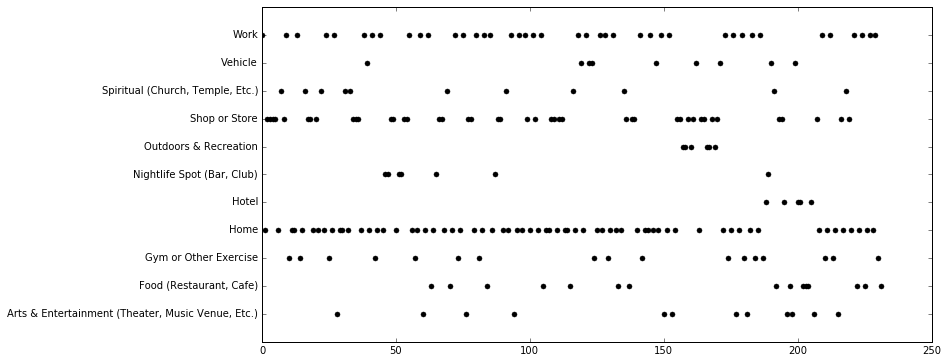

In [35]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pickle
import numpy as np

%matplotlib inline

le = preprocessing.LabelEncoder()
le.fit(state)
state_code = le.transform(state)
state_uniq = np.unique(state)

plt.figure(figsize=(12,6))
plt.plot(state_code,'.k',markersize=10)
plt.yticks(range(len(state_uniq)), state_uniq)
axes = plt.gca()
axes.set_ylim([-1, len(state_uniq)])

In [5]:
print np.unique(state)
print state
le = preprocessing.LabelEncoder()
le.fit(state)
state_code = le.transform(state)
print state_code


["Another's Home" 'Food (Restaurant, Cafe)' 'Home' 'Shop or Store'
 'Shop or Store, Home' 'Work']
['Work' 'Home' 'Home' 'Food (Restaurant, Cafe)' 'Work' "Another's Home"
 'Home' "Another's Home" 'Home' 'Work' 'Shop or Store' 'Home'
 'Shop or Store' 'Home' 'Home' 'Work' 'Work' 'Home' 'Home' 'Work' 'Home'
 'Work' 'Home' 'Food (Restaurant, Cafe)' 'Work' "Another's Home" 'Home'
 'Home' 'Shop or Store' 'Home' 'Work' 'Home' 'Work' 'Home' 'Work' 'Work'
 'Work' 'Work' 'Food (Restaurant, Cafe)' 'Home' 'Food (Restaurant, Cafe)'
 'Home' 'Shop or Store' 'Home' 'Work' 'Home' 'Work' 'Work' 'Home' 'Work'
 'Home' 'Work' 'Work' 'Shop or Store, Home' 'Work'
 'Food (Restaurant, Cafe)' 'Shop or Store, Home' 'Shop or Store'
 'Shop or Store, Home' 'Shop or Store, Home' 'Work' 'Work' 'Work'
 'Shop or Store, Home' 'Shop or Store, Home' 'Work' 'Home'
 'Shop or Store, Home' "Another's Home" 'Shop or Store'
 'Shop or Store, Home' "Another's Home" 'Shop or Store'
 'Shop or Store, Home' 'Shop or Store' 'Shop or St